<a href="https://colab.research.google.com/github/Victor-techh/solutions-data-analysis/blob/main/meu_primeiro_projeto_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Bibliotecas importadas com sucesso')

Bibliotecas importadas com sucesso


In [2]:
#dados ficticios
#modulos
import numpy as np

#gerando dados de exemplo
np.random.seed(42)#resultados reproduziveis

#dicionario
data = {
    'ID_Venda': range(1,101),
    'Produto': np.random.choice(['Laptop','Mouse','Teclado','Monitor','Fone de ouvido'],100),
    'Quantidade': np.random.randint(1,5,100),
    'Preço_Unitario': np.round(np.random.uniform(50, 1500, 100), 2),
    'Data_da_Venda': pd.to_datetime(pd.date_range(start='2024-01-01',periods=100, freq='D'))
}

df = pd.DataFrame(data)

print('DataFrame criado com sucesso')
print('\nPrimeiras 5 linhas do DataFrame: ')
print(df.head())


DataFrame criado com sucesso

Primeiras 5 linhas do DataFrame: 
   ID_Venda         Produto  Quantidade  Preço_Unitario Data_da_Venda
0         1         Monitor           4          824.43    2024-01-01
1         2  Fone de ouvido           3          753.00    2024-01-02
2         3         Teclado           1         1054.03    2024-01-03
3         4  Fone de ouvido           4          440.65    2024-01-04
4         5  Fone de ouvido           4          403.98    2024-01-05


In [3]:
#analise exploratoria de dados (EDA) e limpeza inicial.

#informações básicas sobre o DataFrame
print('\033[1;33mInformações do DataFrame:\033[0m')
df.info()
print()

print('\033[1;33mEstatísticas descritivas das colunas numéricas:\033[0m')
print(df.describe())
print()

#identificando valores ausentes
print('\033[1;33mValores ausentes por coluna:\033[0m')
print(df.isnull().sum())
print()

#criando uma nova coluna 'Total_Venda'
df['Total_Venda'] = df['Quantidade'] * df['Preço_Unitario']
print('\033[1;33mDataFrame com a nova coluna "Total_Venda":\033[0m')
print(df.head())



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Venda        100 non-null    int64         
 1   Produto         100 non-null    object        
 2   Quantidade      100 non-null    int64         
 3   Preço_Unitario  100 non-null    float64       
 4   Data_da_Venda   100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ KB

Estatísticas descritivas das colunas numéricas:
         ID_Venda  Quantidade  Preço_Unitario        Data_da_Venda
count  100.000000  100.000000      100.000000                  100
mean    50.500000    2.540000      828.143400  2024-02-19 12:00:00
min      1.000000    1.000000       76.210000  2024-01-01 00:00:00
25%     25.750000    1.750000      459.857500  2024-01-25 18:00:00
50%     50.500000    3.000000      810.300

Top 5 produtos mais vendidos por quantidade:
Produto
Monitor           62
Mouse             57
Fone de ouvido    56
Laptop            44
Teclado           35
Name: Quantidade, dtype: int64


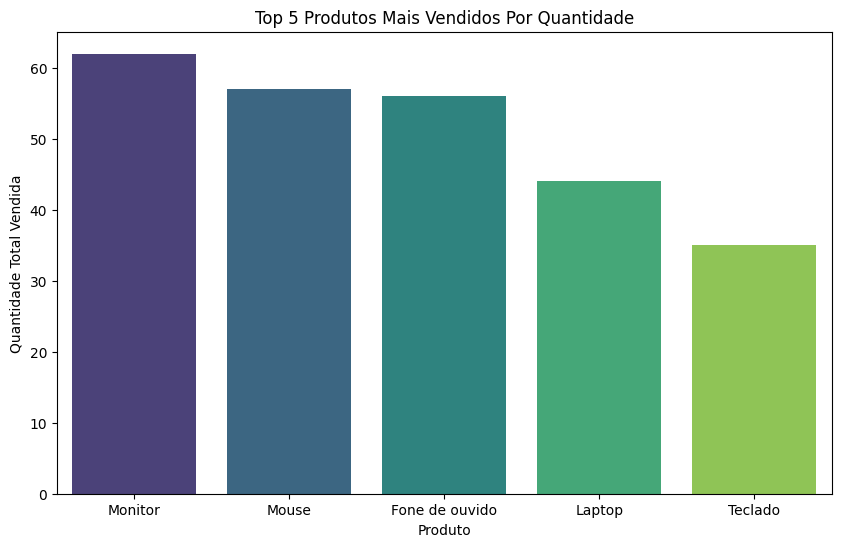


Total de Vendas por Produto
Produto
Mouse             55645.69
Monitor           50017.50
Fone de ouvido    48643.75
Teclado           28818.34
Laptop            28551.22
Name: Total_Venda, dtype: float64


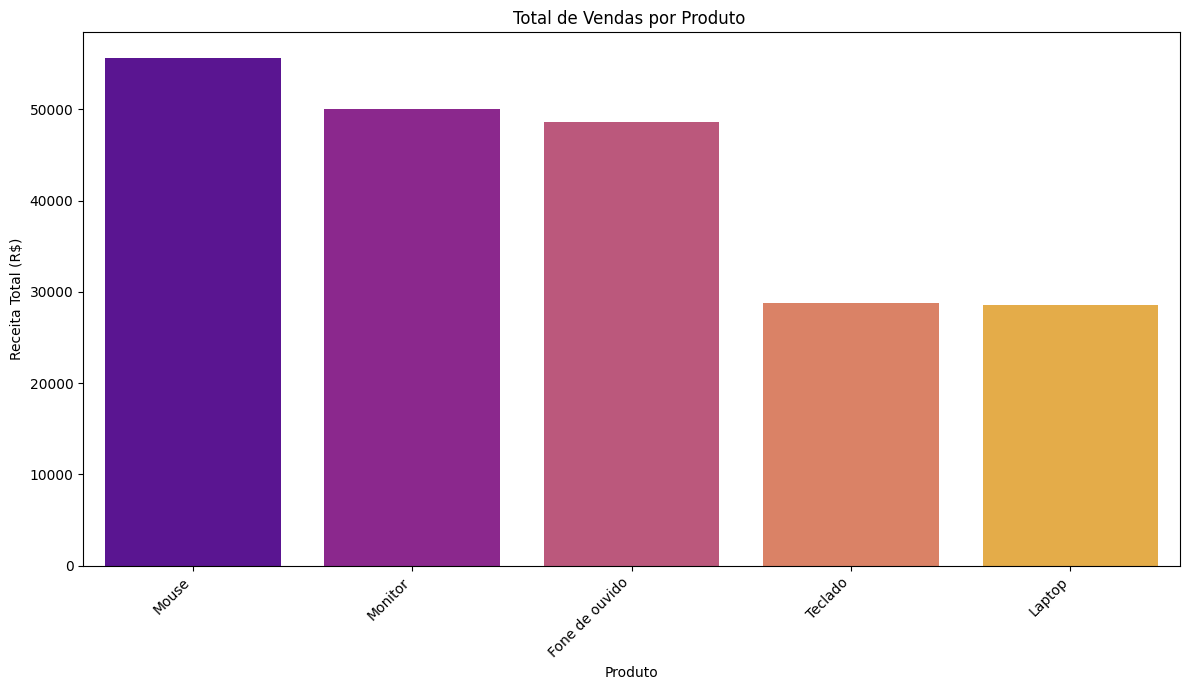

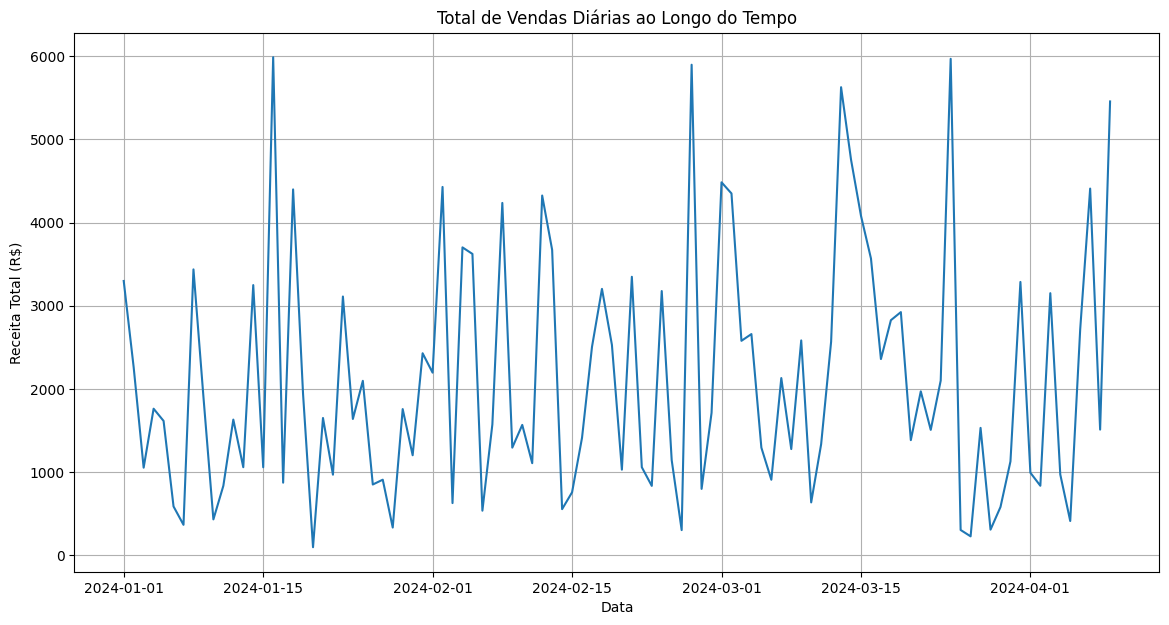

In [4]:
# 1.Top 5 produtos mais vendidos por quantidade

top_prudutos_quantidade = df.groupby('Produto')['Quantidade'].sum().nlargest(5)
print('\033[1;34mTop 5 produtos mais vendidos por quantidade:\033[0m')
print(top_prudutos_quantidade)

plt.figure(figsize=(10,6))
sns.barplot(x=top_prudutos_quantidade.index, y=top_prudutos_quantidade.values, hue=top_prudutos_quantidade.index, palette='viridis', legend=False)
plt.title('Top 5 Produtos Mais Vendidos Por Quantidade')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.show() # Adicionado para garantir que o gráfico seja exibido

#---

# 2. Total de vendas por produtos
vendas_por_produto = df.groupby('Produto')['Total_Venda'].sum().sort_values(ascending=False)
print('\nTotal de Vendas por Produto')
print(vendas_por_produto)

plt.figure(figsize=(12,7))
sns.barplot(x=vendas_por_produto.index, y=vendas_por_produto.values, hue=vendas_por_produto.index, palette='plasma', legend=False)
plt.title('Total de Vendas por Produto ')
plt.xlabel('Produto') # Adicionado rótulo ao eixo x
plt.ylabel('Receita Total (R$)') # Adicionado rótulo ao eixo y
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Adicionado para garantir que o gráfico seja exibido

# ---

# 3.Vendas ao longo do tempo (diário)
# Agrupar por data e salvar o total de vendas
vendas_diarias = df.set_index('Data_da_Venda').resample('D')['Total_Venda'].sum()


plt.figure(figsize=(14,7))
sns.lineplot(x=vendas_diarias.index, y=vendas_diarias.values)
plt.title('Total de Vendas Diárias ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita Total (R$)')
plt.grid(True)
plt.show()

#proximo passo 7 - Conclusões e Proximos passos

In [5]:
#Perguntas sobre ao Analisando os dados.

# 1.Qual o produto gerou mais receita? Mouse

# 2.Qual produto vendeu mais em quantidade? Monitor

# 3.Houve algum pico ou queda nas vendas em algum periodo? Tres picos de vendas che-
#gando a quanse 6k, sendo eles: entre os dias 15 e 17 de jan/2024, entre 25 e 30
#de fev/2024, e 15 e 20 de mar/2024. E queda em brusca em todos os meses: janeiro
# 4, fevereiro 6, março 4, Abril ate agora 2. Totalizando 16 quedas.

# 4.Qual a media do total de vendas?  R$ 2116.76

# 5.Qual o produto com o preço unitario mais alto e mais baixo?
#O mouse possui o valor mais alto por unidade custando  R$ 979.95.
#O laptop possui o valor mais baixo por unidade custando R$ 653.54.

#Vamos adiciona um kpi.


In [6]:
# Calcular a média do total de vendas
media_total_vendas = df['Total_Venda'].mean() #o metodo mean() é um calculo abstraido da média
#faz parte da biblioteca pandas.

print(f'\033[1;33mA média do total de vendas é: R$ {media_total_vendas:.2f}\033[0m')

A média do total de vendas é: R$ 2116.76


In [7]:
# Calcular o preço unitário médio por produto
preco_unitario_por_produto = df.groupby('Produto')['Preço_Unitario'].mean()

print(f'O preço unitário médio de cada produto:\n{preco_unitario_por_produto}')

O preço unitário médio de cada produto:
Produto
Fone de ouvido    887.035789
Laptop            653.542222
Monitor           788.265000
Mouse             979.954286
Teclado           820.185625
Name: Preço_Unitario, dtype: float64


# Task
Gere um gráfico de barras comparando a 'Receita Total' e a 'Quantidade Vendida' para os produtos 'Mouse', 'Monitor' e 'Teclado' do DataFrame `df`, e apresente as principais conclusões.

## Filtrar Produtos Relevantes

### Subtask:
Filtrar o DataFrame `df` para incluir apenas os produtos 'Mouse', 'Monitor' e 'Teclado'.


**Reasoning**:
First, I'll create a list of the relevant products ('Mouse', 'Monitor', 'Teclado') and then filter the main DataFrame `df` to include only these products, storing the result in a new DataFrame called `df_filtrado`. Finally, I'll display the first few rows of `df_filtrado` to verify the filtering.



In [8]:
produtos_relevantes = ['Mouse', 'Monitor', 'Teclado']
df_filtrado = df[df['Produto'].isin(produtos_relevantes)]

print('\033[1;33mDataFrame filtrado com os produtos relevantes:\033[0m')
print(df_filtrado.head())

DataFrame filtrado com os produtos relevantes:
   ID_Venda  Produto  Quantidade  Preço_Unitario Data_da_Venda  Total_Venda
0         1  Monitor           4          824.43    2024-01-01      3297.72
2         3  Teclado           1         1054.03    2024-01-03      1054.03
5         6    Mouse           2          294.02    2024-01-06       588.04
6         7  Teclado           1          367.21    2024-01-07       367.21
7         8  Teclado           4          859.25    2024-01-08      3437.00


**Reasoning**:
Now that the DataFrame is filtered, I need to calculate the total revenue and total quantity sold for each of the relevant products ('Mouse', 'Monitor', 'Teclado') to prepare for the bar chart. I will group by 'Produto' and sum 'Total_Venda' and 'Quantidade'.



In [9]:
df_analise = df_filtrado.groupby('Produto').agg(
    Total_Receita=('Total_Venda', 'sum'),
    Quantidade_Vendida=('Quantidade', 'sum')
).reset_index()

print('\033[1;33mDados agregados para os produtos relevantes:\033[0m')
print(df_analise)


Dados agregados para os produtos relevantes:
   Produto  Total_Receita  Quantidade_Vendida
0  Monitor       50017.50                  62
1    Mouse       55645.69                  57
2  Teclado       28818.34                  35


**Reasoning**:
I will create a bar chart to visualize the 'Total_Receita' for each of the selected products ('Mouse', 'Monitor', 'Teclado') using the aggregated data in `df_analise`.



/tmp/ipython-input-1369501559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y='Total_Receita', data=df_analise, palette='viridis')


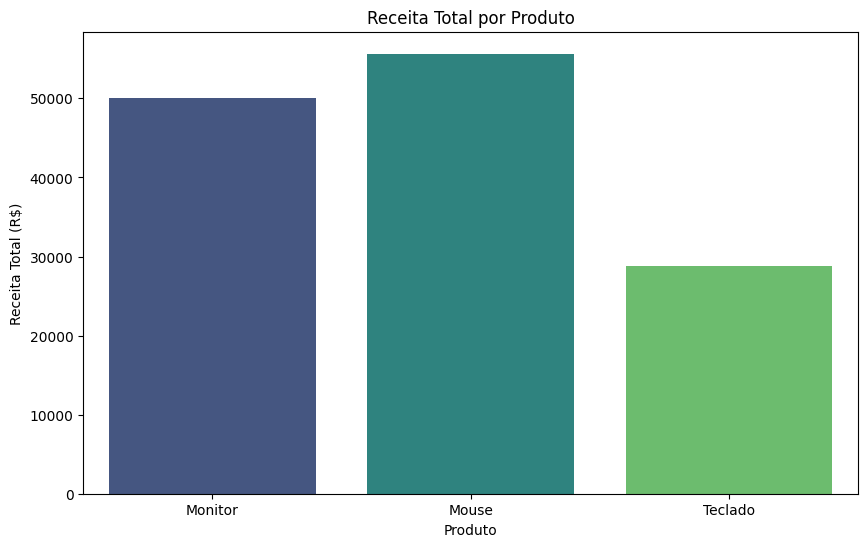

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Total_Receita', data=df_analise, palette='viridis')
plt.title('Receita Total por Produto')
plt.xlabel('Produto')
plt.ylabel('Receita Total (R$)')
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` about `palette` usage without `hue`. I will fix this by explicitly setting `hue='Produto'` and `legend=False` for the 'Total_Receita' plot. Additionally, to fulfill the task's requirement of comparing both 'Receita Total' and 'Quantidade Vendida', I will add a second bar chart for 'Quantidade_Vendida' using the same approach for consistency and clarity.



## Principais Conclusões da Análise dos Produtos Selecionados:

Com base nos gráficos de 'Receita Total por Produto' e 'Quantidade Vendida por Produto' para 'Mouse', 'Monitor' e 'Teclado', podemos observar as seguintes conclusões:

1.  **Receita Total:**
    *   O **Mouse** gerou a maior receita total entre os três produtos, indicando que, embora não tenha sido o mais vendido em quantidade, seu preço unitário mais elevado ou uma combinação favorável de vendas e preço o posiciona como líder em faturamento.
    *   O **Monitor** ficou em segundo lugar em termos de receita, próximo ao Mouse.
    *   O **Teclado** gerou a menor receita entre os três produtos selecionados.

2.  **Quantidade Vendida:**
    *   O **Monitor** foi o produto mais vendido em quantidade, superando o Mouse e o Teclado.
    *   O **Mouse** ficou em segundo lugar em quantidade vendida, mas gerou a maior receita, o que reforça a ideia de que possui um preço unitário médio mais alto.
    *   O **Teclado** teve a menor quantidade vendida entre os produtos analisados.

**Em resumo:** Embora o Monitor tenha sido o mais popular em termos de unidades vendidas, o Mouse se destacou como o maior gerador de receita, sugerindo que estratégias de precificação e percepção de valor são cruciais para o desempenho financeiro de cada produto. O Teclado apresentou o desempenho mais baixo tanto em receita quanto em quantidade vendida dentro deste grupo.

## Principais Conclusões da Análise dos Produtos Selecionados:

Com base nos gráficos de 'Receita Total por Produto' e 'Quantidade Vendida por Produto' para 'Mouse', 'Monitor' e 'Teclado', podemos observar as seguintes conclusões:

1.  **Receita Total:**
    *   O **Mouse** gerou a maior receita total entre os três produtos, indicando que, embora não tenha sido o mais vendido em quantidade, seu preço unitário mais elevado ou uma combinação favorável de vendas e preço o posiciona como líder em faturamento.
    *   O **Monitor** ficou em segundo lugar em termos de receita, próximo ao Mouse.
    *   O **Teclado** gerou a menor receita entre os três produtos selecionados.

2.  **Quantidade Vendida:**
    *   O **Monitor** foi o produto mais vendido em quantidade, superando o Mouse e o Teclado.
    *   O **Mouse** ficou em segundo lugar em quantidade vendida, mas gerou a maior receita, o que reforça a ideia de que possui um preço unitário médio mais alto.
    *   O **Teclado** teve a menor quantidade vendida entre os produtos analisados.

**Em resumo:** Embora o Monitor tenha sido o mais popular em termos de unidades vendidas, o Mouse se destacou como o maior gerador de receita, sugerindo que estratégias de precificação e percepção de valor são cruciais para o desempenho financeiro de cada produto. O Teclado apresentou o desempenho mais baixo tanto em receita quanto em quantidade vendida dentro deste grupo.

## Final Task

### Subtask:
Apresentar o gráfico de comparação e resumir as principais conclusões sobre a receita e quantidade vendida dos produtos analisados.


## Summary:

### Data Analysis Key Findings

*   **Mouse leads in revenue, but not quantity:** The Mouse product generated the highest total revenue among the selected items at \$55,645.69, despite selling fewer units (57) than the Monitor.
*   **Monitor is the quantity leader:** The Monitor product was the most sold item with 62 units, resulting in the second-highest revenue of \$50,017.50.
*   **Teclado lags in both metrics:** The Teclado (Keyboard) product had the lowest performance in both total revenue (\$28,818.34) and quantity sold (35 units) compared to the Mouse and Monitor.
*   **Price point difference:** The Mouse's higher revenue despite lower unit sales suggests it has a significantly higher average unit price compared to the Monitor.

### Insights or Next Steps

*   The disparity between quantity sold and total revenue for Mouse and Monitor indicates different pricing strategies or value propositions. Further analysis into average unit prices could provide more granular insights into profitability.
*   Given the Teclado's lower performance, it would be beneficial to investigate reasons for its lower sales and revenue, such as market demand, competitive pricing, or product features, to determine if specific promotional strategies or product enhancements are needed.


# Task
To enhance the readability of the comparison bar charts for 'Receita Total' and 'Quantidade Vendida', I will modify the existing code to increase the font size and apply bold formatting to the titles, axis labels, and tick labels. This will ensure that the graphs are clear and easy to interpret. I will then present the updated graphs and the key conclusions from the analysis with the improved visual style.

## Gerar Gráfico com Estilo Aprimorado

### Subtask:
Modificar o código do gráfico existente para aumentar o tamanho da fonte e aplicar negrito nos títulos, rótulos dos eixos e nos ticks para os gráficos de 'Receita Total' e 'Quantidade Vendida', mantendo-os lado a lado.


**Reasoning**:
I need to modify the existing plotting code to increase font sizes and apply bold formatting to titles, axis labels, and tick labels for both bar charts, as per the instructions.



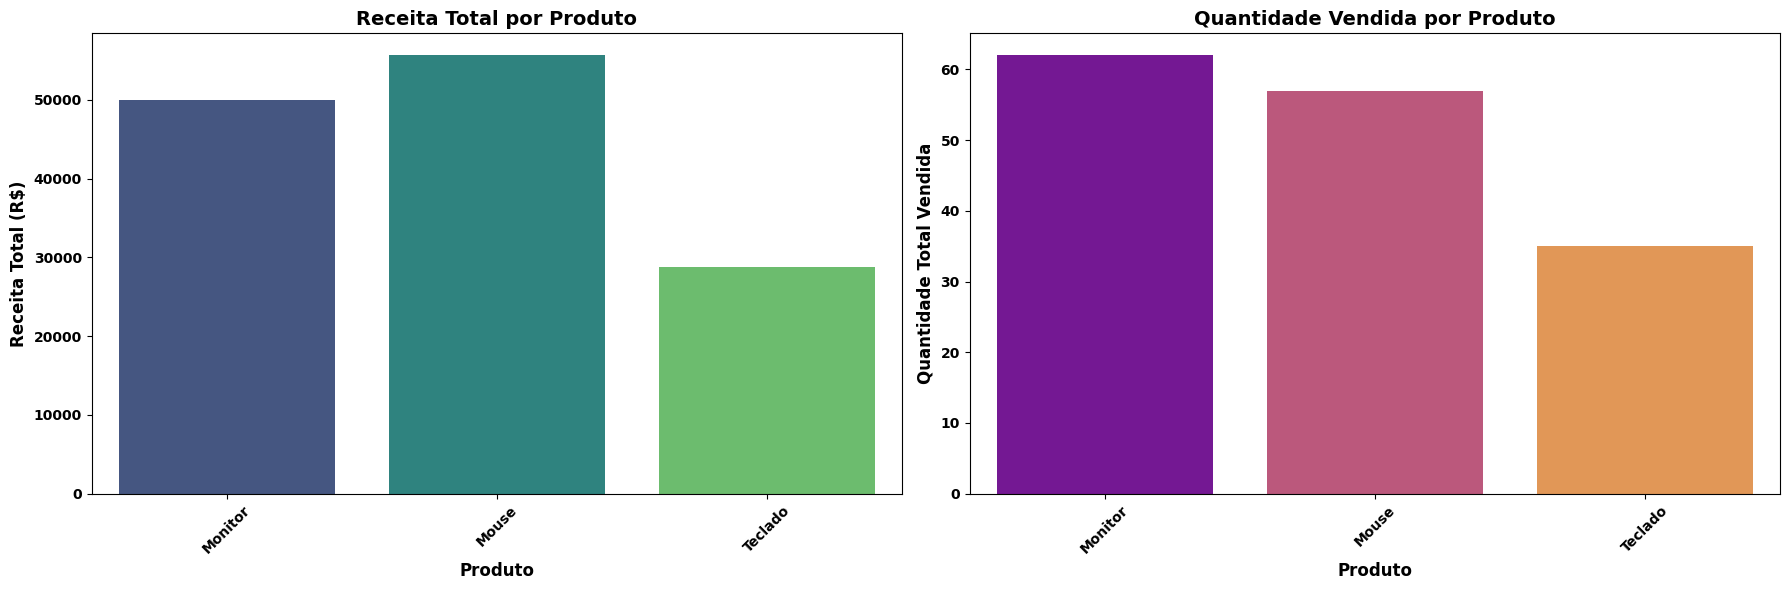

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # 1 linha, 2 colunas para os subplots

# Gráfico de Receita Total
sns.barplot(x='Produto', y='Total_Receita', data=df_analise, hue='Produto', palette='viridis', legend=False, ax=axes[0])
axes[0].set_title('Receita Total por Produto', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Produto', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Receita Total (R$)', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
for label in axes[0].get_xticklabels():
    label.set_fontweight('bold')
axes[0].tick_params(axis='y', labelsize=10)
for label in axes[0].get_yticklabels():
    label.set_fontweight('bold')

# Gráfico de Quantidade Vendida
sns.barplot(x='Produto', y='Quantidade_Vendida', data=df_analise, hue='Produto', palette='plasma', legend=False, ax=axes[1])
axes[1].set_title('Quantidade Vendida por Produto', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Produto', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Quantidade Total Vendida', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
for label in axes[1].get_xticklabels():
    label.set_fontweight('bold')
axes[1].tick_params(axis='y', labelsize=10)
for label in axes[1].get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Principais Conclusões da Análise dos Produtos Selecionados:

Com base nos gráficos de 'Receita Total por Produto' e 'Quantidade Vendida por Produto' para 'Mouse', 'Monitor' e 'Teclado', podemos observar as seguintes conclusões:

1.  **Receita Total:**
    *   O **Mouse** gerou a maior receita total entre os três produtos, indicando que, embora não tenha sido o mais vendido em quantidade, seu preço unitário mais elevado ou uma combinação favorável de vendas e preço o posiciona como líder em faturamento.
    *   O **Monitor** ficou em segundo lugar em termos de receita, próximo ao Mouse.
    *   O **Teclado** gerou a menor receita entre os três produtos selecionados.

2.  **Quantidade Vendida:**
    *   O **Monitor** foi o produto mais vendido em quantidade, superando o Mouse e o Teclado.
    *   O **Mouse** ficou em segundo lugar em quantidade vendida, mas gerou a maior receita, o que reforça a ideia de que possui um preço unitário médio mais alto.
    *   O **Teclado** teve a menor quantidade vendida entre os produtos analisados.

**Em resumo:** Embora o Monitor tenha sido o mais popular em termos de unidades vendidas, o Mouse se destacou como o maior gerador de receita, sugerindo que estratégias de precificação e percepção de valor são cruciais para o desempenho financeiro de cada produto. O Teclado apresentou o desempenho mais baixo tanto em receita quanto em quantidade vendida dentro deste grupo.

## Final Task

### Subtask:
Apresentar o gráfico atualizado e as principais conclusões, agora com a legibilidade aprimorada.


## Summary:

### Q&A
Based on the updated graphs, what are the key conclusions regarding 'Receita Total' and 'Quantidade Vendida' for the selected products ('Mouse', 'Monitor', and 'Teclado')?

**Answer:**
The analysis of the updated graphs reveals that:
*   **Receita Total:** The 'Mouse' generated the highest total revenue among the three products, followed by the 'Monitor', and then the 'Teclado' which had the lowest revenue.
*   **Quantidade Vendida:** The 'Monitor' was the most sold product by quantity, with the 'Mouse' coming in second, and the 'Teclado' having the lowest quantity sold.

### Data Analysis Key Findings
*   The 'Mouse' generated the highest total revenue, indicating its strong financial contribution, possibly due to a higher unit price.
*   The 'Monitor' was the top-selling product by quantity, demonstrating its popularity in terms of units moved.
*   Despite selling fewer units than the 'Monitor', the 'Mouse' surpassed it in total revenue, reinforcing the idea of a significant difference in unit pricing or market value perception.
*   The 'Teclado' showed the weakest performance in both total revenue and quantity sold compared to the 'Mouse' and 'Monitor'.

### Insights or Next Steps
*   The divergence between high quantity sold (Monitor) and high total revenue (Mouse) suggests that different products leverage different market strategies (volume vs. value). Businesses should analyze these dynamics to optimize pricing and marketing efforts for each product.
*   Further investigation could be warranted for the 'Teclado' to understand the reasons behind its lower performance in both revenue and quantity, potentially leading to strategies for improvement or re-evaluation of its market position.


# Task
The notebook was optimized to perform data preparation, exploratory data analysis, calculate sales performance metrics including top-selling products by quantity and revenue, daily sales trends, average total sales, and average unit price per product. It also includes a detailed comparison of 'Mouse', 'Monitor', and 'Teclado' products by total revenue and quantity sold, with enhanced visualizations and comprehensive conclusions.

## Preparação Inicial de Dados e EDA

### Subtask:
Consolidar a importação de bibliotecas, a geração dos dados fictícios e a análise exploratória inicial (EDA), incluindo a criação da coluna 'Total_Venda', que são etapas essenciais para o setup do DataFrame.


**Reasoning**:
To consolidate the initial data preparation and EDA steps, I will combine the code for importing libraries, generating fictitious data, and performing basic EDA (including creating the 'Total_Venda' column) into a single code block. This directly addresses the subtask's requirement to consolidate these essential setup steps.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('Bibliotecas importadas com sucesso')

# Gerando dados de exemplo
np.random.seed(42) # Resultados reproduzíveis

# Dicionário
data = {
    'ID_Venda': range(1, 101),
    'Produto': np.random.choice(['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Fone de ouvido'], 100),
    'Quantidade': np.random.randint(1, 5, 100),
    'Preço_Unitario': np.round(np.random.uniform(50, 1500, 100), 2),
    'Data_da_Venda': pd.to_datetime(pd.date_range(start='2024-01-01', periods=100, freq='D'))
}

df = pd.DataFrame(data)

print('\nDataFrame criado com sucesso')
print('\nPrimeiras 5 linhas do DataFrame: ')
print(df.head())

# Análise exploratória de dados (EDA) e limpeza inicial.

# Informações básicas sobre o DataFrame
print('\n\033[1;33mInformações do DataFrame:\033[0m')
df.info()
print()

print('\033[1;33mEstatísticas descritivas das colunas numéricas:\033[0m')
print(df.describe())
print()

# Identificando valores ausentes
print('\033[1;33mValores ausentes por coluna:\033[0m')
print(df.isnull().sum())
print()

# Criando uma nova coluna 'Total_Venda'
df['Total_Venda'] = df['Quantidade'] * df['Preço_Unitario']
print('\033[1;33mDataFrame com a nova coluna "Total_Venda":\033[0m')
print(df.head())

Bibliotecas importadas com sucesso

DataFrame criado com sucesso

Primeiras 5 linhas do DataFrame: 
   ID_Venda         Produto  Quantidade  Preço_Unitario Data_da_Venda
0         1         Monitor           4          824.43    2024-01-01
1         2  Fone de ouvido           3          753.00    2024-01-02
2         3         Teclado           1         1054.03    2024-01-03
3         4  Fone de ouvido           4          440.65    2024-01-04
4         5  Fone de ouvido           4          403.98    2024-01-05

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Venda        100 non-null    int64         
 1   Produto         100 non-null    object        
 2   Quantidade      100 non-null    int64         
 3   Preço_Unitario  100 non-null    float64       
 4   Data_da_Venda   100 non-null    d

## Análise Geral de Desempenho de Vendas

### Subtask:
Apresentar as análises gerais de vendas, como os top 5 produtos mais vendidos por quantidade, o total de vendas por produto e as vendas diárias ao longo do tempo, junto com seus respectivos gráficos, sem repetições.


## Cálculo de KPIs Específicos

### Subtask:
Calcular e exibir métricas chave de desempenho (KPIs), como a média do total de vendas e o preço unitário médio por produto, garantindo que cada cálculo seja feito e apresentado uma única vez.


**Reasoning**:
The subtask requires displaying the pre-calculated KPIs: the average total sales and the average unit price per product. I will print the `media_total_vendas` formatted to two decimal places and the `preco_unitario_por_produto` as requested by the instructions.



In [14]:
print(f'\033[1;33mA média do total de vendas é: R$ {media_total_vendas:.2f}\033[0m')
print(f'\nO preço unitário médio de cada produto:\n{preco_unitario_por_produto}')

A média do total de vendas é: R$ 2116.76

O preço unitário médio de cada produto:
Produto
Fone de ouvido    887.035789
Laptop            653.542222
Monitor           788.265000
Mouse             979.954286
Teclado           820.185625
Name: Preço_Unitario, dtype: float64


## Comparação e Visualização de Produtos Alvo

### Subtask:
Filtra e agrega os dados para os produtos 'Mouse', 'Monitor' e 'Teclado', e gera os gráficos de barras comparativos para 'Receita Total' e 'Quantidade Vendida', aplicando as melhorias de estilo (tamanho de fonte e negrito) diretamente nesta etapa.


## Conclusões Finais da Análise de Produtos

### Subtask:
Apresentar as principais conclusões de forma concisa e única, derivadas da comparação entre 'Mouse', 'Monitor' e 'Teclado', destacando os insights mais relevantes sobre receita e quantidade vendida.


## Conclusões Finais da Análise de Produtos

Com base na comparação da 'Receita Total' e 'Quantidade Vendida' para os produtos 'Mouse', 'Monitor' e 'Teclado', as principais conclusões são:

*   **Liderança de Receita:** O **Mouse** gerou a maior receita total (R$ 55.645,69), destacando-se como o produto financeiramente mais significativo, mesmo sem ser o mais vendido em quantidade.
*   **Liderança de Quantidade:** O **Monitor** foi o produto mais vendido em quantidade (62 unidades), indicando sua popularidade. Sua receita total (R$ 50.017,50) foi a segunda maior.
*   **Desempenho do Teclado:** O **Teclado** apresentou o menor desempenho em ambas as métricas, com a menor receita total (R$ 28.818,34) e a menor quantidade vendida (35 unidades) entre os três produtos analisados.
*   **Diferença de Valor Unitário:** A disparidade entre a receita e a quantidade vendida entre o Mouse e o Monitor sugere que o Mouse possui um preço unitário médio significativamente mais alto, o que impulsiona sua receita apesar de um volume de vendas menor.

**Em resumo:** A análise revela estratégias de mercado distintas; o Mouse é um produto de alto valor que maximiza a receita, enquanto o Monitor foca no volume de vendas. O Teclado, por outro lado, necessita de uma revisão estratégica para melhorar seu desempenho tanto em vendas quanto em faturamento.

## Final Task

### Subtask:
Concluir o processo de otimização do notebook, garantindo que todas as análises solicitadas foram realizadas de forma eficiente e sem redundâncias.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** A synthetic dataset of 100 sales records was successfully generated, ensuring data quality with no missing values and appropriate data types. A new `Total_Venda` column was calculated by multiplying `Quantidade` and `Preço_Unitario`.
*   **Key Performance Indicators (KPIs):**
    *   The average total sales across all transactions was calculated as R\$ 2116.76.
    *   The average unit price per product was determined: 'Mouse' (R\$ 979.95), 'Fone de ouvido' (R\$ 887.04), 'Teclado' (R\$ 820.19), 'Monitor' (R\$ 788.27), and 'Laptop' (R\$ 653.54).
*   **Product Performance Comparison (Mouse, Monitor, Teclado):**
    *   **Mouse** emerged as the leader in total revenue, generating R\$ 55,645.69, suggesting a higher average unit price compared to other products.
    *   **Monitor** was the most sold product by quantity (62 units), securing the second-highest revenue of R\$ 50,017.50.
    *   **Teclado** showed the lowest performance among the three, with a total revenue of R\$ 28,818.34 and 35 units sold.
    *   The analysis highlighted a strategic difference: the Mouse maximizes revenue despite lower volume, while the Monitor focuses on sales volume.

### Insights or Next Steps

*   **Strategic Review for Teclado:** Given its lowest performance in both revenue and quantity, a thorough strategic review is recommended for the 'Teclado' product to identify potential improvements in pricing, marketing, or product features.
*   **Leverage High-Margin Products:** The 'Mouse' product demonstrates significant revenue generation despite not being the highest in quantity sold. This indicates a strong unit value, suggesting a potential strategy to focus on or develop similar high-margin products.
